# **PostgreSQL 외래키 제약조건 ON DELETE**

일반적인 외래키 제약을 걸어주는 쿼리를 가볍게 보고 on delete 절



```sql
-- 참고) 외래 키 제약조건의 4가지 규칙
--
-- 1. 부모 테이블이 자식 테이블보다 먼저 생성되어야 한다.
-- 2. 부모 테이블은 자식 테이블과 같은 데이터 타입을 가져야 한다.
-- 3. 부모 테이블에서 참조된 컬럼의 값만 자식 테이블에서 입력 가능하다.
-- 4. 참조되는 컬럼은 모두 프라이머리 키이거나 unique 제약조건 형식이어야 한다.

-- 생성하려는 테이블 목록
-- notice_board : 게시판 테이블 (부모 테이블, 참조되는 테이블)
-- attached_file : 첨부파일 (자식 테이블, 참조하는 테이블)


drop table if exists notice_board;
drop table if exists attached_file;


-- 게시판 테이블
create table notice_board (
	notice_id numeric(5) not null primary key, -- 게시판 아이디
	notice_dc varchar(60) not null -- 게시판 내용
);

insert into notice_board
values
(1, '게시판 내용1'),
(2, '게시판 내용2'),
(3, '게시판 내용3'),
(4, '게시판 내용4');


-- 첨부 파일 테이블
create table attached_file (
	file_id numeric(5) not null primary key,-- 파일 id
	file_name varchar(20) not null,			-- 파일 이름
	notice_id numeric(5), 					-- 게시판 id
	constraint notice_fk foreign key (notice_id)
    			references notice_board(notice_id)
);
-- notice_id numeric(5) references notice_board(notice_id) 처럼 해도 가능

insert into attached_file values (1, 'file1.xlsx', 1);
insert into attached_file values (2, 'file2.xlsx', 2);
insert into attached_file values (3, 'file3.xlsx', 3);

select * from notice_board;
select * from attached_file;
```



아래와 같은 형태로 데이터가 들어간 테이블이 생성



```sql
-- 게시판 테이블
notice_id|notice_dc |
---------+-----------+
        1|게시판 내용1|
        2|게시판 내용2|
        3|게시판 내용3|
        4|게시판 내용4|
---------+-----------+


-- 파일첨부 테이블
file_id|file_name |notice_id|
-------+----------+---------+
      1|file1.xlsx|        1|
      2|file2.xlsx|        2|
      3|file3.xlsx|        3|
-------+----------+---------+
```



- 일반적인 외래키 제약 조건을 거는 방식.
- 같이 부모 테이블의 특정 row 를 지우려고 하면 참고하고 있는
자식 테이블에 의해서 에러가 난다.



```sql
delete from notice_board where notice_id = 2;

-- 에러 내역:
-- 삭제 작업이 "notice_fk" 참조키(foreign key) 제약 조건 -
-- "attached_file" 테이블 - 을 위반했습니다
```



# **DELETE ON**

- on delete no action [on delete 절을 작성하지 않으면 기본값.]
- on delete restrict [이건 알아보지 않을 것이다. 트랜잭션과 연관이 있다.]
- on delete cascade
- on delete set null
- on delete set default

**on delete cascade**

- 부모 테이블에서 어떤 외래키를 삭제하면, 그 외래키를 참조하는 자식 테이블의
ROW가 모두 삭제되는 기능을 부여.



```sql
drop table if exists attached_file;
drop table if exists notice_board;

-- 게시판 테이블
create table notice_board (
	notice_id numeric(5) not null primary key, -- 게시판 아이디
	notice_dc varchar(60) not null -- 게시판 내용
);

insert into notice_board
values
(1, '게시판 내용1'),
(2, '게시판 내용2'),
(3, '게시판 내용3'),
(4, '게시판 내용4');


-- 첨부 파일 테이블
create table attached_file (
	file_id numeric(5) not null primary key,-- 파일 id
	file_name varchar(20) not null,			-- 파일 이름
	notice_id numeric(5), 					-- 게시판 id
	constraint notice_fk foreign key (notice_id)
    			references notice_board(notice_id)
    			on delete cascade -- 추가!
);

insert into attached_file values (1, '1번게시판_파일1.txt', 1);
insert into attached_file values (2, '1번게시판_파일2.txt', 1);
insert into attached_file values (3, '1번게시판_파일3.txt', 1);
insert into attached_file values (4, '2번게시판_파일1.txt', 2);
insert into attached_file values (5, '3번게시판_파일1.txt', 3);

select * from notice_board;
select * from attached_file;

delete from notice_board where notice_id = 1;

```




- 부모 테이블의 Tuple이 삭제되고, notice_id=1 을 외래키로 갖던 자식 테이블의 Tuple 들도 모두 삭제.


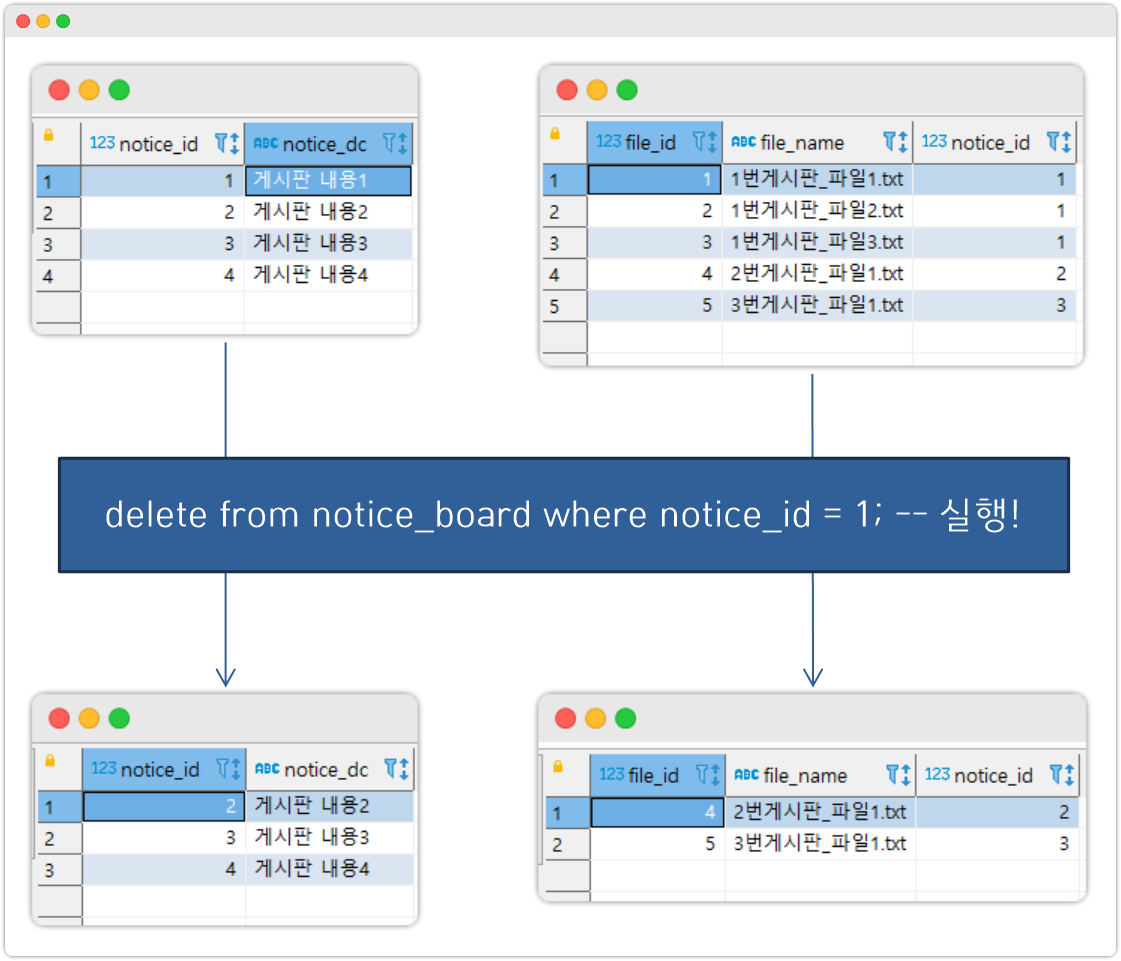

**on delete set null**

- 부모 테이블에서 삭제가 일어나면,
참조를 하던 테이블의 외래키 값이 null 로 세팅.



```sql
drop table if exists attached_file;
drop table if exists notice_board;


-- 게시판 테이블
create table notice_board (
	notice_id numeric(5) not null primary key, -- 게시판 아이디
	notice_dc varchar(60) not null -- 게시판 내용
);

insert into notice_board
values
(1, '게시판 내용1'),
(2, '게시판 내용2'),
(3, '게시판 내용3'),
(4, '게시판 내용4');


-- 첨부 파일 테이블
create table attached_file (
	file_id numeric(5) not null primary key,-- 파일 id
	file_name varchar(20) not null,			-- 파일 이름
	notice_id numeric(5), 					-- 게시판 id
	constraint notice_fk foreign key (notice_id)
    			references notice_board(notice_id)
    			on delete set null -- 추가!
);

insert into attached_file values (1, '1번게시판_파일1.txt', 1);
insert into attached_file values (2, '1번게시판_파일2.txt', 1);
insert into attached_file values (3, '1번게시판_파일3.txt', 1);
insert into attached_file values (4, '2번게시판_파일1.txt', 2);
insert into attached_file values (5, '3번게시판_파일1.txt', 3);

select * from notice_board;
select * from attached_file;

delete from notice_board where notice_id = 1;
```



- 부모 테이블의 Tuple이 삭제되고, 자식 테이블의 외래키는 NULL로 세팅.

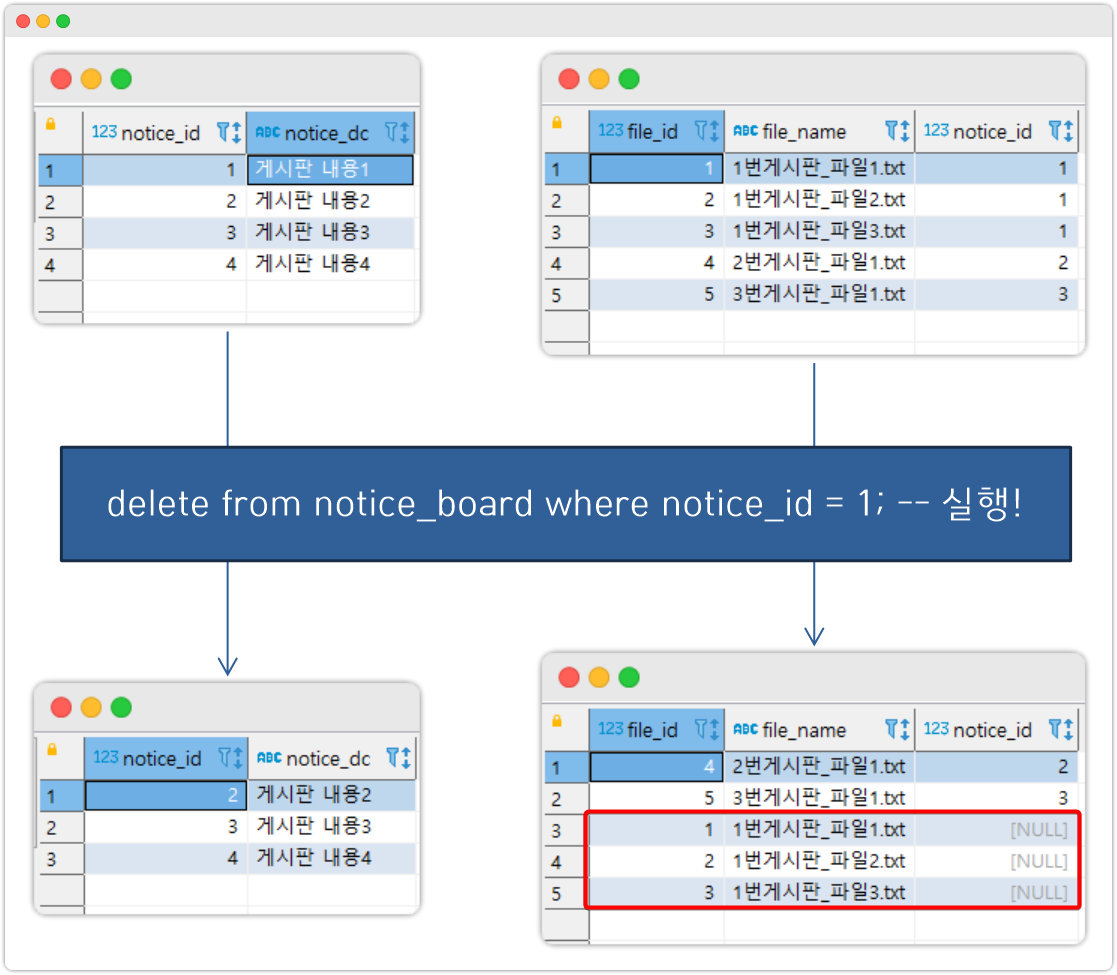

**on delete set default**

- 부모 테이블에서 삭제가 일어나면,
참조를 하던 테이블의 외래키 값이 기존에 설정되어 있던 기본값으로 세팅.



```sql
drop table if exists notice_board;
drop table if exists attached_file;


-- 게시판 테이블
create table notice_board (
	notice_id numeric(5) not null primary key, -- 게시판 아이디
	notice_dc varchar(60) not null -- 게시판 내용
);

insert into notice_board
values
(1, '게시판 내용1'),
(2, '게시판 내용2'),
(3, '게시판 내용3'),
(4, '게시판 내용4');


-- 첨부 파일 테이블
create table attached_file (
	file_id numeric(5) not null primary key,-- 파일 id
	file_name varchar(20) not null,			-- 파일 이름
	notice_id numeric(5) default 1,        -- 게시판 id, default 추가!
	constraint notice_fk foreign key (notice_id)
    			references notice_board(notice_id)
    			on delete set default -- 추가!
);

insert into attached_file values (1, '1번게시판_파일1.txt', 1);
insert into attached_file values (2, '1번게시판_파일2.txt', 1);
insert into attached_file values (3, '1번게시판_파일3.txt', 1);
insert into attached_file values (4, '2번게시판_파일1.txt', 2);
insert into attached_file values (5, '3번게시판_파일1.txt', 3);

select * from notice_board;
select * from attached_file;

delete from notice_board where notice_id = 3;

```




- 부모 테이블의 Tuple이 삭제되고, 자식 테이블의 외래키는 default 값으로 세팅.

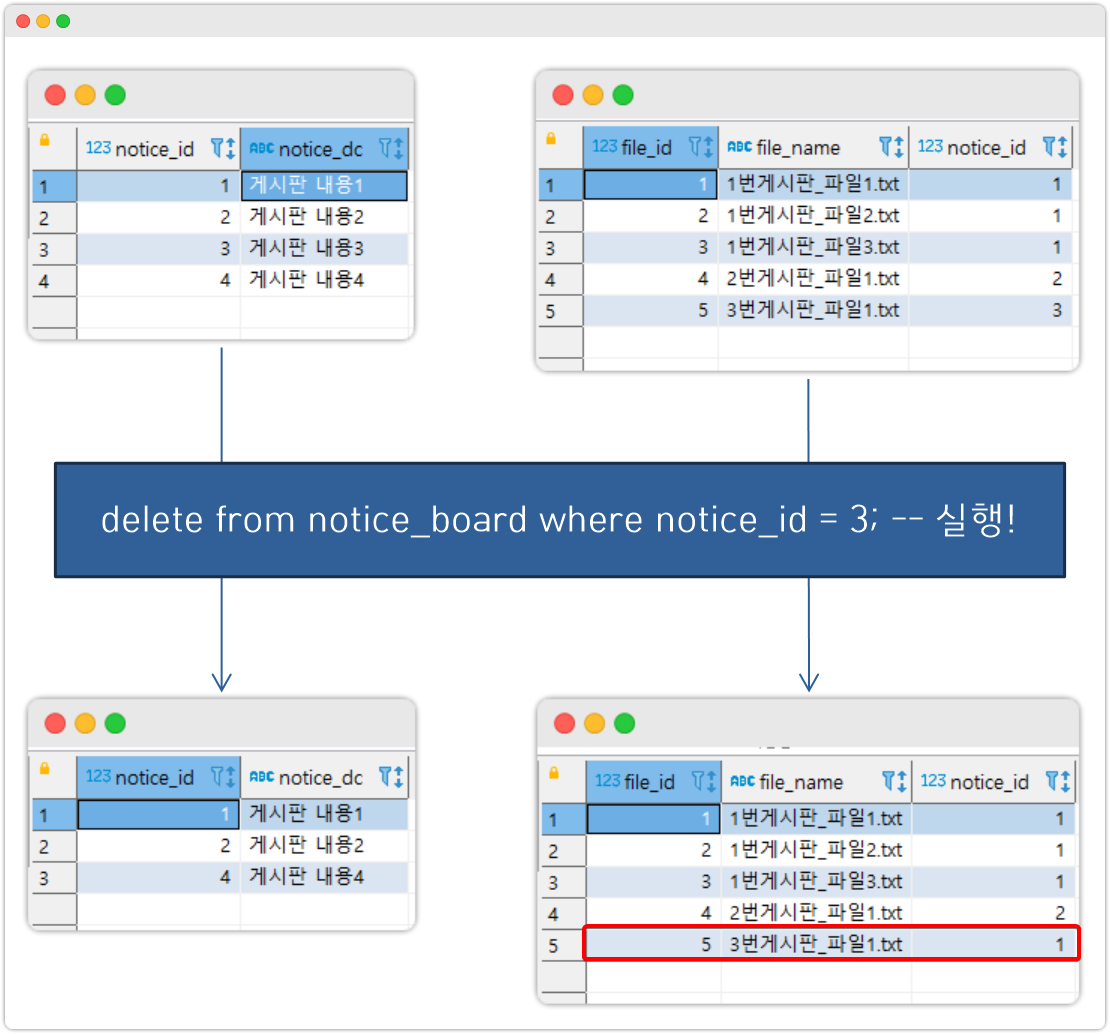